<a href="https://colab.research.google.com/github/vikaskyiit/ML-Projects/blob/main/HandGrade_AI_A_Handwritten_Essay_Evaluation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# HandGrade AI+: A Handwritten Essay Evaluation System
# -----------------------------------------------------
# This project evaluates handwritten student essays using OCR and Machine Learning.
# It combines EasyOCR for text extraction and a regression model trained on the ASAP AES dataset.

In [2]:
# Install Required Packages
!pip install -q easyocr
!pip install -q sentence-transformers
!pip install -q nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [3]:
#Import Libraries
import easyocr
from sentence_transformers import SentenceTransformer, util
import nltk
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

nltk.download('punkt')  # Download NLTK tokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
#Initialize OCR and NLP Models
reader = easyocr.Reader(['en'])  # EasyOCR reader for English
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Sentence-BERT for semantic embeddings

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
#Define Helper Functions
def clean_text(text):
    """Clean text by removing punctuation and digits."""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text.strip()


In [7]:
#Upload and Load IELTS Essay Dataset

# Please upload `ielts_writing_dataset.csv` and inspect column names
print("Upload the IELTS dataset file (it must contain essay text and score columns)")
uploaded_dataset = files.upload()
dataset_path = list(uploaded_dataset.keys())[0]
df = pd.read_csv(dataset_path)

Upload the IELTS dataset file (it must contain essay text and score columns)


Saving ielts_writing_dataset.csv to ielts_writing_dataset (1).csv


In [8]:
print("\nAvailable columns:", df.columns.tolist())


Available columns: ['Task_Type', 'Question', 'Essay', 'Examiner_Commen', 'Task_Response', 'Coherence_Cohesion', 'Lexical_Resource', 'Range_Accuracy', 'Overall']


In [10]:
for essay_col in ['Essay', 'essay', 'text']:
    for score_col in ['Overall', 'Band', 'Score', 'score', 'band']:
        if essay_col in df.columns and score_col in df.columns:
            df = df[[essay_col, score_col]].dropna()
            df.columns = ['Essay', 'Band']
            break
    else:
        continue
    break
else:
    raise KeyError("No valid 'Essay' and 'Band/Overall' column found. Please check column names.")

print("\nDataset Loaded Successfully. Sample:")
print(df.head())


Dataset Loaded Successfully. Sample:
                                               Essay  Band
0  Between 1995 and 2010, a study was conducted r...   5.5
1  Poverty represents a worldwide crisis. It is t...   6.5
2  The left chart shows the population change hap...   5.0
3  Human beings are facing many challenges nowada...   5.5
4  Information about the thousands of visits from...   7.0


In [11]:
#NLP START - Convert Essays to Embeddings
print("Encoding all essays into sentence embeddings...")
essay_embeddings = model.encode(df['Essay'].tolist(), convert_to_tensor=True)
X = np.array([emb.cpu().numpy() for emb in essay_embeddings])
y = df['Band'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Regression Model
reg = Ridge()
reg.fit(X_train, y_train)

# Evaluate the model
y_pred = reg.predict(X_test)
print("Model Evaluation:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Encoding all essays into sentence embeddings...
Model Evaluation:
RMSE: 0.9763246194142096
R² Score: 0.08156239303704393


In [12]:
#Upload and Extract Handwritten Essay Image
uploaded_essay = files.upload()
image_path = list(uploaded_essay.keys())[0]

Saving mygov_1565854626483123.jpg to mygov_1565854626483123.jpg


In [13]:
#CR START - Extract Handwritten Text from Image
print("Running OCR on the uploaded image...")
ocr_text = " ".join(reader.readtext(image_path, detail=0))
print("\nExtracted Text:", ocr_text)

Running OCR on the uploaded image...

Extracted Text: Aeve te inteqity % the mahm 7h 8iah+ Gqairs+ the enumiu wha tuu tu hatu Ino Yhun land Aince mothr land is Iy g will mWve1 a bide Hh < Huul and ulaHa Ga d by my Awibs cuuu And jul blcause 86 aults 9 w;lj nU1 Ya he them t lu Zjojn 9 A Aoldiu "t I no + task t Ovuk cam and Jochlz eac and blems Which Com u in Path {ut Xhli 9 wili ~y levd bul , S+ % my fse t myaug an d matlm my Conclusio d-uam {orc Lq Aucc but Wonk Kor i" 9 We duam b ecbme eQ Joldi01 , we have # wohl Kon i4 hudthh than nirq w i fout ay  eKbunts nd 0n e ican cachiwve Ahen qoals (o 94 9 become UM Aoldus, 9 wTU all m4 %Xbo +t Aewve mothutlund at the Uost 6 Md"{c: Lu 'hctevet Hy 1a Juluirud became va Pe-fect Aol diet like btuave Kovute ianty CouLcq e, difuipline 9 Will to n myaey n+ los+ but mo + the [east Soldi ux alle A2 matim Jut Uke ca puusm 1$ alive har 9 Q un #i ( h i4 hatuk Beah Anilasly Q natm will exi'/+ the Iol di ex will tiqht bor Outc natim" Ao 9 will 6e # < hcppi

In [14]:
#NLP + ML - Predict Score from OCR Extracted Text

def predict_score_from_handwritten(text):
    cleaned = clean_text(text)
    embedding = model.encode([cleaned])
    predicted_score = reg.predict(embedding)[0]
    return round(predicted_score, 2)

predicted = predict_score_from_handwritten(ocr_text)
print("\nPredicted Essay Score (IELTS Band):", predicted)


Predicted Essay Score (IELTS Band): 4.32


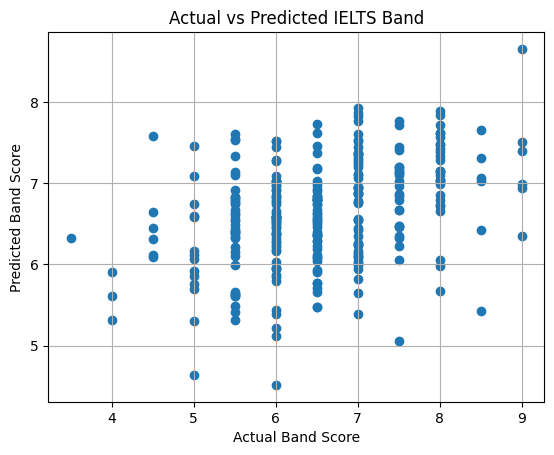

In [15]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Band Score")
plt.ylabel("Predicted Band Score")
plt.title("Actual vs Predicted IELTS Band")
plt.grid(True)
plt.show()
